In [64]:
import numpy as np

In [65]:
def grad1_u(x,v):
    return v

In [66]:
def grad2_u(x,u,v):
    return 2*u*grad1_u(x,v)

In [81]:
def grad1_v(x,vv1):
    return vv1

In [90]:
def grad2_v(x,u,v,v1,vv1):
    return 2*(grad1_u(x,v)*v1 + u*grad1_v(x,vv1))

In [102]:
u_init = 0.5
u_fin = 1
v_init = 0
v_grad_init = 1
s0 = 0.3
epsilon = 0.00005
h = 0.25

In [70]:
rng = (0,1)

In [105]:
def solver_RK2(init,init_grad,rn=(0,1),h=0.1):
    initial,final = rn
    #N = int((final - initial)/h)
    T = np.arange(initial,final,h)
    u_0 = init[0]
    u_1 = init_grad[0]
    v_0 = init[1]
    v_1 = init_grad[1]
    u_plot = []
    u_plot.append(u_0.tolist())
    for i in T:
        k1 = (h**2)/2*grad2_u(i,u_0,u_1)
        k2 = (h**2)/2*grad2_u((i+2*h/3),(u_0+2/3*h*u_1+2/3*k1),(u_1+4/3*h*k1))
        u_0 = u_0 + h*u_1 +1/2*(k1+k2)
        u_1 = u_1 + h/2*(k1+3*k2)
        l1 = (h**2)/2*grad2_v(i,u_0,u_1,v_0,v_1)
        l2 = (h**2)/2*grad2_v((i+2*h/3),u_0,u_1,(v_0+2/3*h*v_1+2/3*l1),(v_1+4/3*h*l1))
        #print(u_0,u_1)
        v_0 = v_0 + h*v_1 +1/2*(l1+l2)
        v_1 = v_1 + h/2*(l1+3*l2)
        u_plot.append(u_0.tolist())
    
    #print("u=",u_0)
    #print("u'=",u_1)
    #print("v=",v_0)
    #print("v'=",v_1)
    return (u_0,v_0),(u_1,v_1),u_plot,T

In [96]:
c_0 = np.array([u_init,v_init])
c_grad = np.array([s0,v_grad_init])
ub,ub_grad,u_plt,T_space = solver_RK2(c_0,c_grad,rng,0.25)
#vb,vb_grad,v_plt,Tv_space = solver_RK2_v(0,1,rng,0.25)
T_space = np.append(T_space,np.array(rng[1]))
u_plt = np.matrix(u_plt)
ub

u= 0.8601213943586733
u'= 0.3264091766489678
v= 1.2697306608786643
v'= 1.119337196935874


(0.8601213943586733, 1.2697306608786643)

In [110]:
def solver_newton(s0,h):
    c_0 = np.array([u_init,v_init])
    c_grad = np.array([s0,v_grad_init])
    ub,ub_grad,_,_ = solver_RK2(c_0,c_grad,rng,h)
    phi_s = ub[0] - u_fin
    phi_grad_s = ub[1]
    print(s0)
    while(abs(phi_s) >= epsilon):    
        s0 = s0 - phi_s/phi_grad_s
        print(s0)
        c_grad = np.array([s0,v_grad_init])
        ub,_,_,_ = solver_RK2(c_0,c_grad,rng,h)
        phi_s = ub[0] - u_fin
        phi_grad_s = ub[1]
    return solver_RK2(c_0,c_grad,rng,h)

In [111]:
ub,ub_grad,u_plt,T_space = solver_newton(s0,h)
T_space = np.append(T_space,np.array(rng[1]))
_,_,u_plt1,T_space1 = solver_newton(s0,h/4)
T_space1 = np.append(T_space1,np.array(rng[1]))

0.3
0.4101639977288802
0.41024780183309517
0.3
0.47749313100401014
0.4766404799785462


In [100]:
def func(x):
    return 1/(2-x)

In [77]:
import matplotlib.pyplot as plt
%matplotlib inline
#import mpld3
#mpld3.enable_notebook()
plt.rcParams['figure.figsize'] = (40.0, 40.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

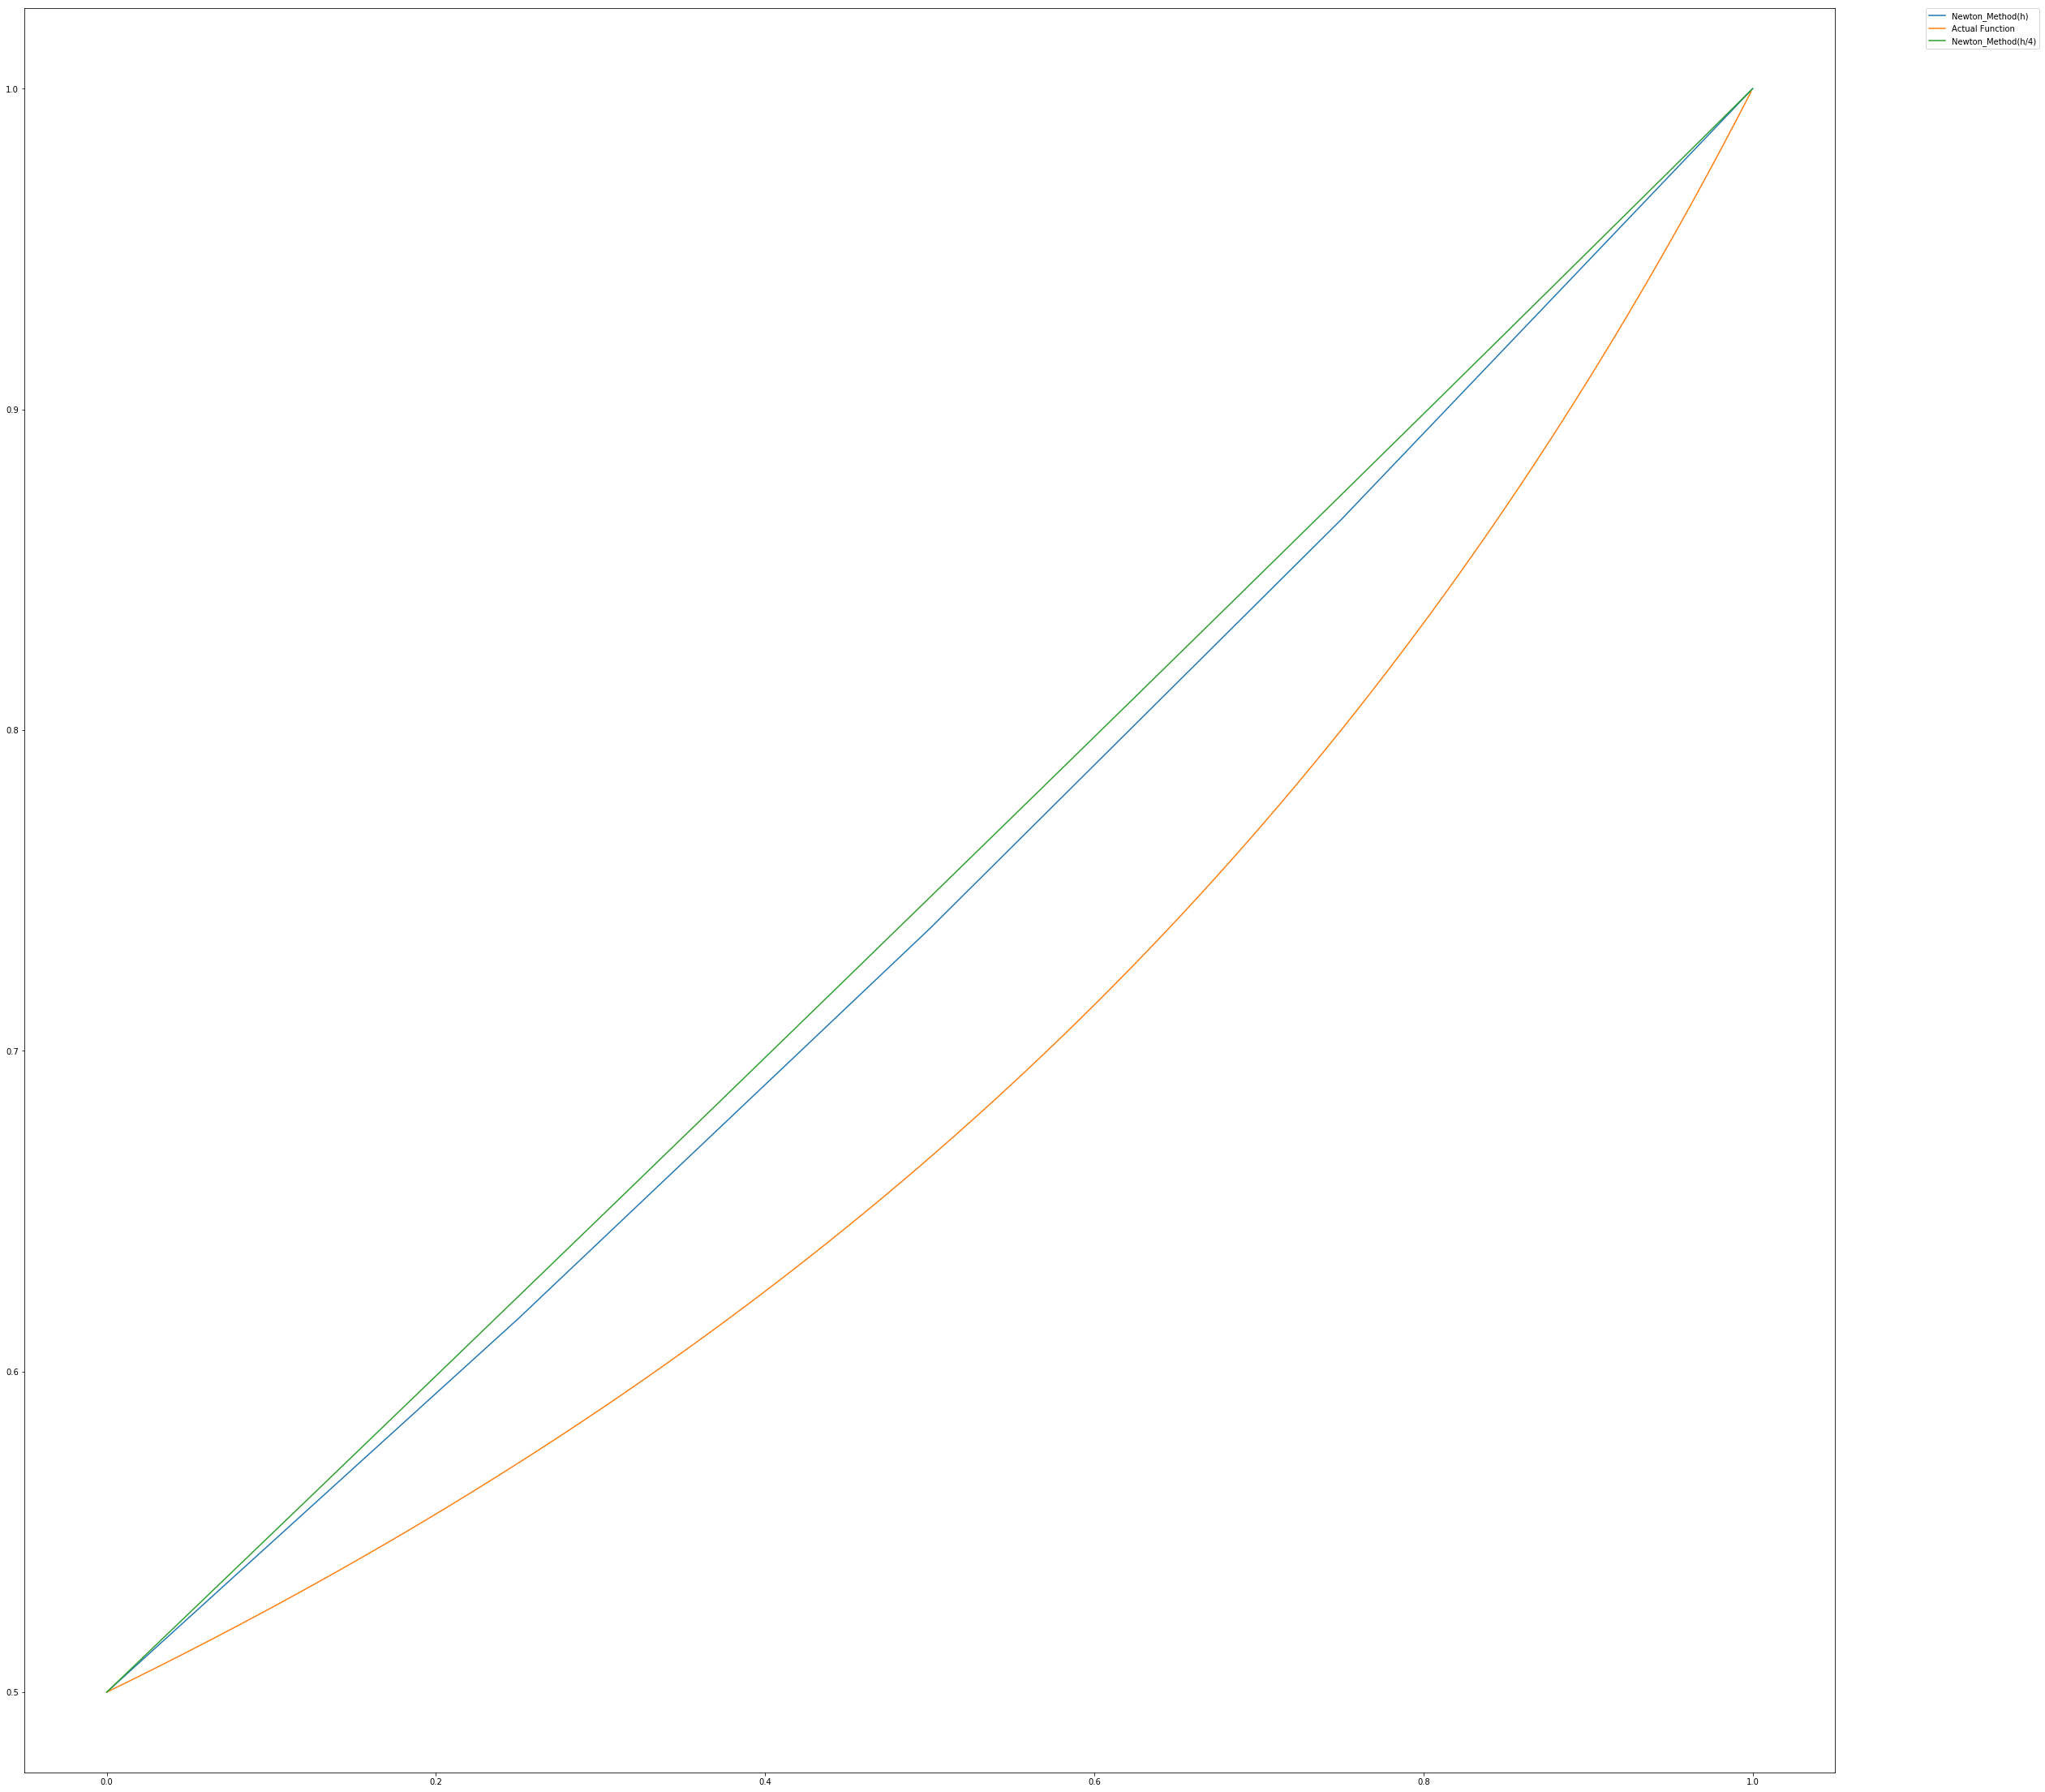

In [104]:
#u_plt = np.matrix(u_plt)
F_space = np.arange(0,1,0.001)
plt.plot(T_space,u_plt,label="Newton_Method(h)")
plt.plot(F_space,func(F_space),label="Actual Function")
plt.plot(T_space1,u_plt1,label="Newton_Method(h/4)")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()